<a href="https://colab.research.google.com/github/dhruvchopra2003/Practicals/blob/master/Computer_Vision_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/deeplabv3_resnet101_coco-586e9e4e.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet101_coco-586e9e4e.pth
100%|██████████| 233M/233M [00:01<00:00, 186MB/s]


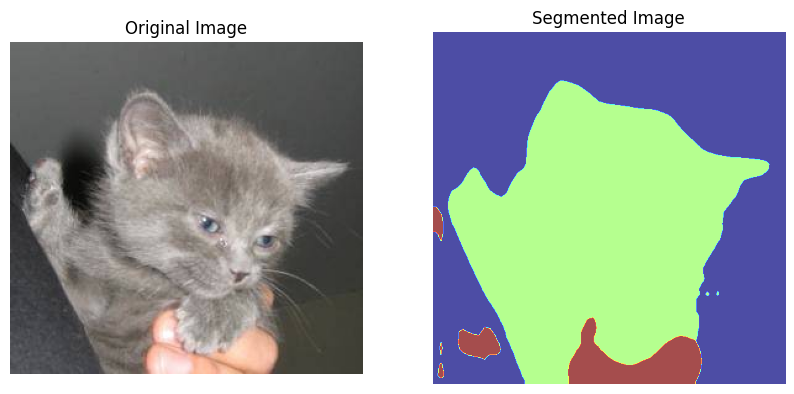

In [ ]:
import torch
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load pre-trained DeepLabV3 model
model = models.segmentation.deeplabv3_resnet101(pretrained=True).eval()

# Load and preprocess the input image
def preprocess_image(image_path):
    input_image = Image.open(image_path).convert('RGB')
    preprocess = transforms.Compose([
        transforms.Resize((520, 520)),  # Resize to model's input size
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    return preprocess(input_image).unsqueeze(0), input_image

# Perform segmentation
def segment_image(image_tensor):
    with torch.no_grad():
        output = model(image_tensor)['out'][0]  # Output logits
    return torch.argmax(output, dim=0).cpu().numpy()

# Visualize the results
def visualize_segmentation(input_image, segmentation_mask):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(input_image)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("Segmented Image")
    plt.imshow(segmentation_mask, cmap='jet', alpha=0.7)
    plt.axis("off")
    plt.show()

# Input image path
image_path = "example.jpg"  # Replace with your image path
image_tensor, input_image = preprocess_image(image_path)

# Segment and visualize
segmentation_mask = segment_image(image_tensor)
visualize_segmentation(input_image, segmentation_mask)


Number of images: 1288
Image shape: (1288, 50, 37)


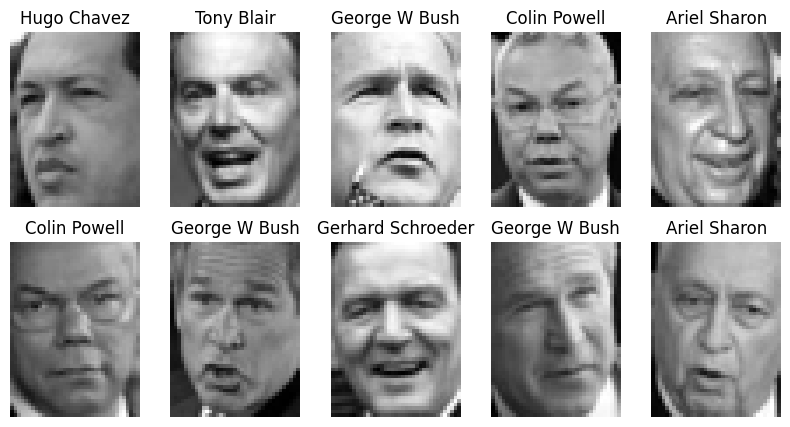

In [ ]:
from sklearn.datasets import fetch_lfw_people

# Load the LFW dataset with only images that have at least 70 pictures per person
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
print(f"Number of images: {len(lfw_people.images)}")
print(f"Image shape: {lfw_people.images.shape}")
# Access the dataset's images and labels
images = lfw_people.images  # The face images
target_names = lfw_people.target_names  # Names of the people in the dataset
targets = lfw_people.target  # Label indices for each image

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for i in range(10):  # Display 10 sample images
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i], cmap="gray")
    plt.title(target_names[targets[i]])
    plt.axis("off")
plt.show()


In [ ]:
%pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566162 sha256=b2f7bb53683380cab6fb595090203db2f980119650d1107d6a98c906f9524442
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


Encoded faces for recognition: 1099


Saving tester.png to tester.png


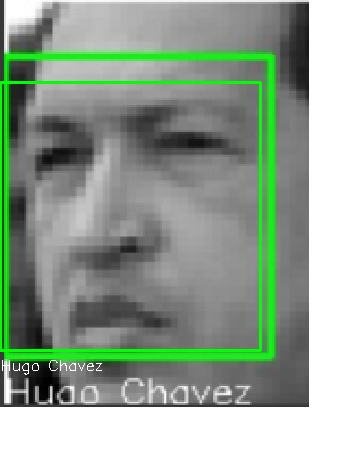

In [ ]:
import face_recognition
import cv2 # Import the cv2 module

# Generate encodings for each face in the dataset
known_faces = []
known_names = []
for i in range(len(images)):
    # Load the image and convert from grayscale to RGB
    image = images[i]

    # Convert image to 8-bit grayscale before converting to RGB
    image_8bit = (image * 255).astype('uint8')

    rgb_image = cv2.cvtColor(image_8bit, cv2.COLOR_GRAY2RGB)

    # Detect and encode face
    encodings = face_recognition.face_encodings(rgb_image)
    if encodings:
        known_faces.append(encodings[0])  # Take the first encoding
        known_names.append(target_names[targets[i]])  # Use target name as label
print("Encoded faces for recognition:", len(known_faces))

from google.colab import files
from IPython.display import Image, display # Import the Image class for display
import face_recognition
import cv2 # Import the cv2 modul
uploaded = files.upload()

# Load and process each uploaded test image
for filename in uploaded.keys():
    test_image = face_recognition.load_image_file(filename)

    # Detect faces in the test image
    test_face_locations = face_recognition.face_locations(test_image)
    test_face_encodings = face_recognition.face_encodings(test_image, test_face_locations)

    # Convert to OpenCV BGR format for display
    test_image = cv2.cvtColor(test_image, cv2.COLOR_RGB2BGR)

    # Iterate over each detected face in the test image
    for (top, right, bottom, left), test_encoding in zip(test_face_locations, test_face_encodings):
        # Compare the face encoding with known faces
        matches = face_recognition.compare_faces(known_faces, test_encoding)
        name = "Unknown"

        # Find the best match
        if True in matches:
            match_index = matches.index(True)
            name = known_names[match_index]

        # Draw a rectangle around the face and label it
        cv2.rectangle(test_image, (left, top), (right, bottom), (0, 255, 0), 2)
        cv2.putText(test_image, name, (left, bottom + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)
    # Display the image with face labels
    _, img_encoded = cv2.imencode('.jpg', test_image)
    display(Image(data=img_encoded.tobytes()))


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (1,965 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 123629 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

Saving text_image.png to text_image (1).png
Uploaded Image:


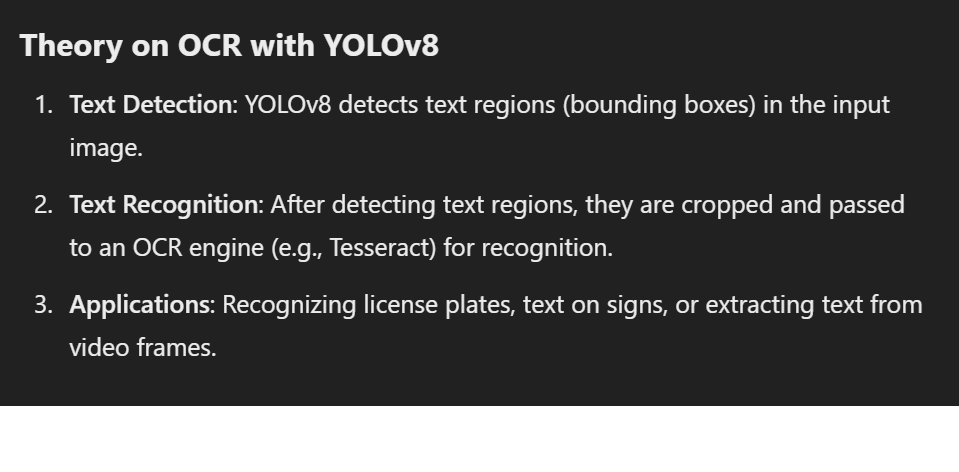


Extracted Text:
Theory on OCR with YOLOv8

1. Text Detection: YOLOv8 detects text regions (bounding boxes) in the input
image.

2. Text Recognition: After detecting text regions, they are cropped and passed

to an OCR engine (e.g., Tesseract) for recognition.

3. Applications: Recognizing license plates, text on signs, or extracting text from

video frames.



In [ ]:
# Install required libraries
!apt install tesseract-ocr -y  # Install Tesseract OCR
!pip install pytesseract opencv-python-headless

# Import libraries
import cv2
import pytesseract
from google.colab.patches import cv2_imshow

# Upload the image to Colab
from google.colab import files
uploaded = files.upload()

# Load the uploaded image
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)

# Convert the image to grayscale (improves OCR accuracy)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform OCR on the grayscale image
text = pytesseract.image_to_string(gray)

# Display the original image
print("Uploaded Image:")
cv2_imshow(image)

# Print the extracted text
print("\nExtracted Text:")
print(text)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:07<00:00, 73.2MB/s]


Step 0, Total Loss: 97287.625
Step 50, Total Loss: 97287.625
Step 100, Total Loss: 97287.625
Step 150, Total Loss: 97287.625
Step 200, Total Loss: 97287.625
Step 250, Total Loss: 97287.625


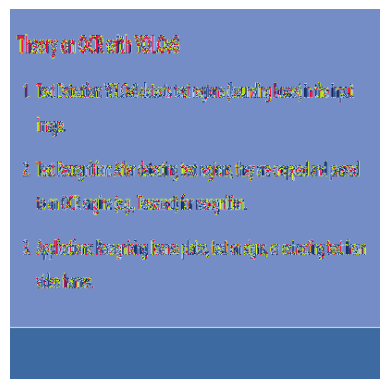

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt

# Load and preprocess images
def load_image(image_path, max_size=400):
    image = Image.open(image_path).convert('RGB')
    transform = transforms.Compose([
        transforms.Resize((max_size, max_size)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    return transform(image).unsqueeze(0)

# Display tensor as an image
def imshow(tensor):
    image = tensor.clone().squeeze(0)
    image = transforms.functional.to_pil_image(image)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Load VGG19 model
vgg = models.vgg19(pretrained=True).features.eval()

# Extract features from layers
def get_features(image, model):
    layers = {'0': 'conv1_1', '5': 'conv2_1', '10': 'conv3_1',
              '19': 'conv4_1', '21': 'conv4_2', '28': 'conv5_1'}
    features = {}
    x = image
    for name, layer in model._modules.items():
        x = layer(x)
        if name in layers:
            features[layers[name]] = x
    return features

# Calculate gram matrix for style
def gram_matrix(tensor):
    _, c, h, w = tensor.size()
    tensor = tensor.view(c, h * w)
    return torch.mm(tensor, tensor.t())

# Load images
content_img = load_image('text_image.png')
style_img = load_image('tester.png')

# Clone content image for optimization
target = content_img.clone().requires_grad_(True)

# Define optimizer
optimizer = optim.Adam([target], lr=0.003)

# Loss weights
style_weights = {'conv1_1': 1.0, 'conv2_1': 0.8, 'conv3_1': 0.5, 'conv4_1': 0.3, 'conv5_1': 0.1}
content_weight = 1e4
style_weight = 1e2

# Get features
content_features = get_features(content_img, vgg)
style_features = get_features(style_img, vgg)
style_grams = {layer: gram_matrix(style_features[layer]) for layer in style_features}

# Training loop
steps = 300
for step in range(steps):
    target_features = get_features(target, vgg)
    content_loss = torch.mean((target_features['conv4_2'] - content_features['conv4_2']) ** 2)

    style_loss = 0
    for layer in style_weights:
        target_gram = gram_matrix(target_features[layer])
        style_gram = style_grams[layer]
        _, c, h, w = target_features[layer].size()
        style_loss += style_weights[layer] * torch.mean((target_gram - style_gram) ** 2) / (c * h * w)

    total_loss = content_weight * content_loss + style_weight * style_loss
    optimizer.zero_grad()
    # total_loss.backward()
    optimizer.step()

    if step % 50 == 0:
        print(f"Step {step}, Total Loss: {total_loss.item()}")

# Display the final output
imshow(target)


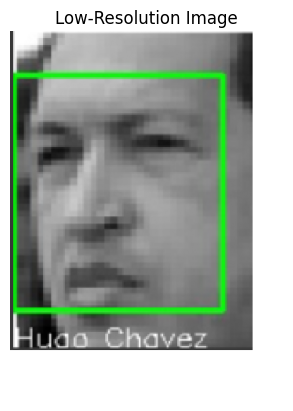

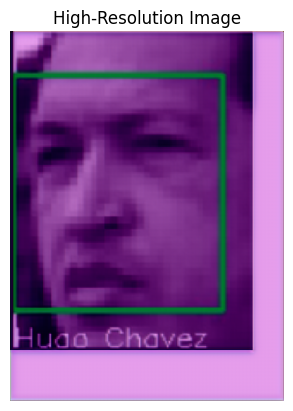

In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the EDSR model from TensorFlow Hub
import tensorflow_hub as hub
# model = hub.load('https://tfhub.dev/captain-pool/esrgan-tf2/1')
model = hub.load("https://www.kaggle.com/models/kaggle/esrgan-tf2/TensorFlow2/esrgan-tf2/1")

def load_image(image_path):
    image = Image.open(image_path).convert('RGB')
    return np.array(image) / 255.0  # Normalize to [0, 1]

def upscale_image(image):
    # Convert to tensor and add batch dimension
    input_tensor = tf.convert_to_tensor(image, dtype=tf.float32)
    input_tensor = tf.expand_dims(input_tensor, axis=0)

    # Run the model
    upscaled_tensor = model(input_tensor)
    upscaled_image = tf.squeeze(upscaled_tensor, axis=0).numpy()
    return np.clip(upscaled_image, 0, 1)

def display_image(image, title="Image"):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load and process image
image_path = 'tester.png'  # Replace with your image path
low_res_image = load_image(image_path)
display_image(low_res_image, "Low-Resolution Image")

# Upscale and display result
high_res_image = upscale_image(low_res_image)
display_image(high_res_image, "High-Resolution Image")


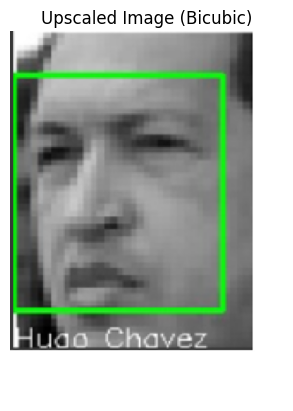

In [ ]:
import cv2
from matplotlib import pyplot as plt

def upscale_image(image_path, scale=2):
    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Get new dimensions
    height, width = image.shape[:2]
    new_width, new_height = width * scale, height * scale

    # Bicubic upscaling
    upscaled = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_CUBIC)
    return upscaled

def display_image(image, title="Image"):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Usage
image_path = 'tester.png'  # Replace with your image path
upscaled_image = upscale_image(image_path)
display_image(upscaled_image, "Upscaled Image (Bicubic)")


Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


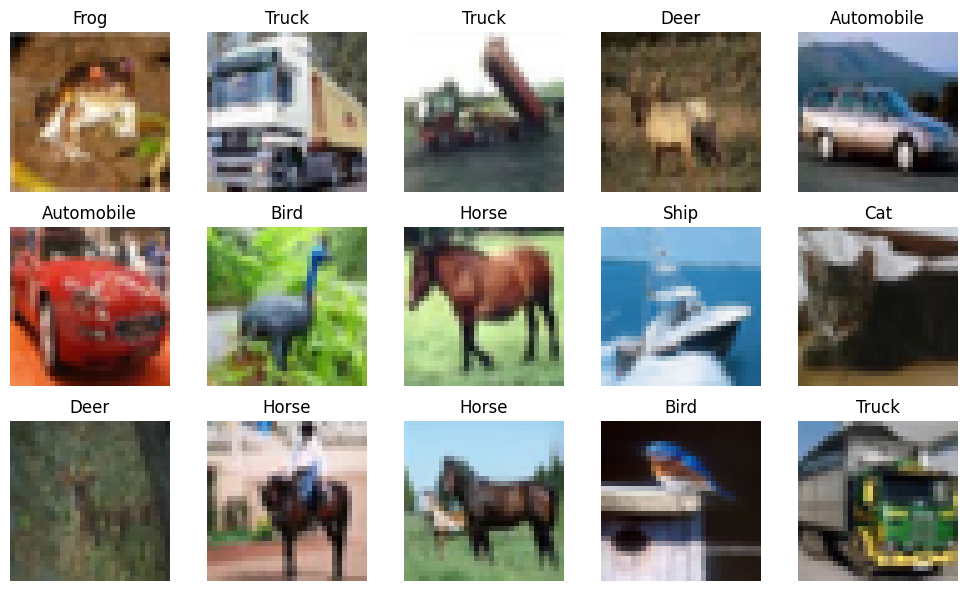

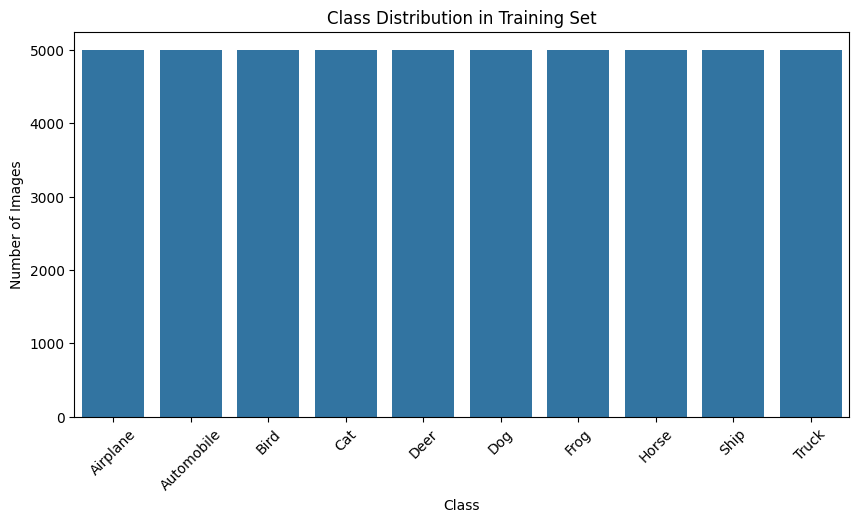

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,171,178 (8.28 MB)

 Trainable params: 2,169,770 (8.28 MB)

 Non-trainable params: 1,408 (5.50 KB)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.5083 - loss: 1.4602 - val_accuracy: 0.6392 - val_loss: 1.0454
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7224 - loss: 0.7952 - val_accuracy: 0.6958 - val_loss: 0.8644
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7911 - loss: 0.5964 - val_accuracy: 0.7340 - val_loss: 0.7747
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8454 - loss: 0.4464 - val_accuracy: 0.7264 - val_loss: 0.8796
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8942 - loss: 0.3081 - val_accuracy: 0.7359 - val_loss: 0.8725
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9320 - loss: 0.2039 - val_accuracy: 0.7590 - val_loss: 0.8362
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9608 - loss: 0.1209 - val_accuracy: 0.7330 - val_loss: 1.0474
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9694 - loss: 0.0921 - val_accurac

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, applications
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim


# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

print("Training data shape:", train_images.shape)  # (50000, 32, 32, 3)
print("Testing data shape:", test_images.shape)    # (10000, 32, 32, 3)

# Normalize images to [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# One-hot encode labels
num_classes = 10
train_labels_cat = tf.keras.utils.to_categorical(train_labels, num_classes)
test_labels_cat = tf.keras.utils.to_categorical(test_labels, num_classes)

# Define class names
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Function to display sample images with labels
def display_sample_images(images, labels, class_names, num_rows=3, num_cols=5):
    plt.figure(figsize=(num_cols * 2, num_rows * 2))
    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i+1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i][0]])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display sample training images
display_sample_images(train_images, train_labels, class_names)

# Explore the distribution of classes
train_label_counts = np.unique(train_labels, return_counts=True)
plt.figure(figsize=(10, 5))
sns.barplot(x=[class_names[i] for i in train_label_counts[0].flatten()], y=train_label_counts[1])
plt.title('Class Distribution in Training Set')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()

def build_simple_cnn(input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential()

    # First Convolutional Block
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Second Convolutional Block
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Fully Connected Layers
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Instantiate the Simple CNN
simple_cnn = build_simple_cnn()
simple_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
simple_cnn.summary()


history_simple_cnn = simple_cnn.fit(train_images, train_labels_cat,
                                    validation_data=(test_images, test_labels_cat),
                                    epochs=10, batch_size=64)


# Note: Pre-trained models expect larger input sizes. We'll resize CIFAR-10 images accordingly.

def resize_images_in_batches(images, size, batch_size=1000):
    resized_images = []
    num_images = images.shape[0]
    for i in range(0, num_images, batch_size):
        batch = images[i:i+batch_size]
        resized_batch = tf.image.resize(batch, size).numpy()
        resized_images.append(resized_batch)
    return np.concatenate(resized_images, axis=0)


# Resize images for VGG16 and ResNet50 (224x224) using batches
train_images_resized_vgg = resize_images_in_batches(train_images, (224, 224), batch_size=1000)
test_images_resized_vgg = resize_images_in_batches(test_images, (224, 224), batch_size=1000)

# Resize images for MobileNetV2 (96x96) using batches
train_images_resized_mobilenet = resize_images_in_batches(train_images, (96, 96), batch_size=1000)
test_images_resized_mobilenet = resize_images_in_batches(test_images, (96, 96), batch_size=1000)


def build_vgg16_finetuned(input_shape=(224, 224, 3), num_classes=10):
    # Load the VGG16 model, excluding the top layers
    base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze the layers except the last 4 layers
    for layer in base_model.layers[:-4]:
        layer.trainable = False

    # Create a new top model
    top_model = base_model.output
    top_model = layers.Flatten()(top_model)
    top_model = layers.Dense(256, activation='relu')(top_model)
    top_model = layers.BatchNormalization()(top_model)
    top_model = layers.Dense(num_classes, activation='softmax')(top_model)

    plt.show()

# Example: Generate metrics for VGG16 Fine-Tuned Model
generate_classification_metrics(vgg16_model, test_images_resized_vgg, test_labels_cat, class_names)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Load and transform CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

trainloader = DataLoader(trainset, batch_size=32, shuffle=True)
testloader = DataLoader(testset, batch_size=32, shuffle=False)

# Load pre-trained ResNet model
model = torchvision.models.resnet18(pretrained=True)

# Modify the final fully connected layer for 10 classes (CIFAR-10 has 10 classes)
model.fc = nn.Linear(model.fc.in_features, 10)

# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Epoch {epoch+1}, Loss: {running_loss/len(trainloader)}, Accuracy: {100 * correct / total}%')

# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test Accuracy: {100 * correct / total}%')


100%|██████████| 170M/170M [00:03<00:00, 43.3MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 156MB/s]


Epoch 1, Loss: 1.1145321052385613, Accuracy: 62.144%
Epoch 2, Loss: 0.7758495081752367, Accuracy: 73.876%
Epoch 3, Loss: 0.6465635184420276, Accuracy: 78.146%
Epoch 4, Loss: 0.5226347693650294, Accuracy: 82.13%
Epoch 5, Loss: 0.42845375132785724, Accuracy: 85.562%
Test Accuracy: 77.97%


True labels:  cat ship ship airplane
Predicted labels:  cat ship ship airplane


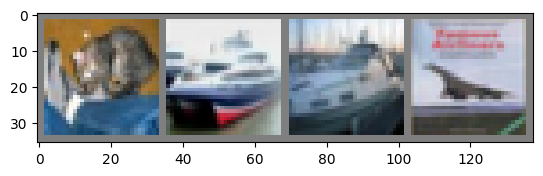

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torch

# Class names for CIFAR-10
classes = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

# Function to unnormalize and display images
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize the image
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # Convert to HWC format for display
    plt.show()

# Display a few test images with their predicted and true labels
model.eval()
dataiter = iter(testloader)
images, labels = next(dataiter)

# Print true labels (with class names)
true_labels = [classes[labels[j]] for j in range(4)]
print('True labels: ', ' '.join(true_labels))

# Predict labels (with class names)
outputs = model(images.to(device))
_, predicted = outputs.max(1)
predicted_labels = [classes[predicted[j]] for j in range(4)]

# Print predicted labels (with class names)
print('Predicted labels: ', ' '.join(predicted_labels))

# Show images
imshow(torchvision.utils.make_grid(images[:4]))


In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.models as models
from torch.utils.data import DataLoader, Dataset
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Load and preprocess the image dataset (Flickr8k or any custom dataset)
class ImageCaptionDataset(Dataset):
    def __init__(self, image_folder, captions_file, transform=None):
        self.image_folder = image_folder
        self.captions_file = captions_file
        self.transform = transform
        self.image_paths = []
        self.captions = []

        # Load captions and image paths
        with open(captions_file, 'r') as f:
            lines = f.readlines()
            for line in lines:
                image_path, caption = line.strip().split('\t')
                self.image_paths.append(image_path)
                self.captions.append(caption)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_name = os.path.join(self.image_folder, self.image_paths[idx])
        image = Image.open(img_name).convert('RGB')

        if self.transform:
            image = self.transform(image)

        caption = self.captions[idx]
        return image, caption

# Transformations to normalize the image data
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Define the CNN for feature extraction (using pre-trained ResNet)
class CNN_Encoder(nn.Module):
    def __init__(self):
        super(CNN_Encoder, self).__init__()
        resnet = models.resnet50(pretrained=True)
        self.resnet = nn.Sequential(*list(resnet.children())[:-1])  # Remove the final fully connected layer

    def forward(self, x):
        with torch.no_grad():
            features = self.resnet(x)
        return features.view(features.size(0), -1)

# Define the RNN for caption generation (LSTM)
class RNN_Decoder(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, vocab_size):
        super(RNN_Decoder, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim + 2048, hidden_dim)
        self.fc = nn.Linear(hidden_dim, vocab_size)

    def forward(self, features, captions):
        embeddings = self.embedding(captions)
        features = features.unsqueeze(1).expand_as(embeddings)
        inputs = torch.cat((features, embeddings), dim=2)
        lstm_out, _ = self.lstm(inputs)
        outputs = self.fc(lstm_out)
        return outputs

# Define the Image Captioning Model
class ImageCaptioningModel(nn.Module):
    def __init__(self, cnn_encoder, rnn_decoder):
        super(ImageCaptioningModel, self).__init__()
        self.cnn_encoder = cnn_encoder
        self.rnn_decoder = rnn_decoder

    def forward(self, images, captions):
        features = self.cnn_encoder(images)
        outputs = self.rnn_decoder(features, captions)
        return outputs

# Define parameters
embedding_dim = 256
hidden_dim = 512
vocab_size = 5000  # You should set this based on your vocabulary size

# Initialize the model
cnn_encoder = CNN_Encoder()
rnn_decoder = RNN_Decoder(embedding_dim, hidden_dim, vocab_size)
model = ImageCaptioningModel(cnn_encoder, rnn_decoder)

# Load the dataset
dataset = ImageCaptionDataset(image_folder='images', captions_file='captions.txt', transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Sample training loop
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Train the model (simple example)
for epoch in range(5):
    model.train()
    total_loss = 0
    for images, captions in dataloader:
        optimizer.zero_grad()

        # Convert captions to integer indices (you need to create a tokenizer and vocab for this)
        # For simplicity, assume captions are already tokenized and converted to indices

        captions = torch.tensor(captions)  # Placeholder; replace with actual indices

        outputs = model(images, captions)

        # Compute loss and backpropagate
        loss = criterion(outputs.view(-1, vocab_size), captions.view(-1))
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f'Epoch [{epoch+1}/5], Loss: {total_loss/len(dataloader)}')

# Example for generating captions from the model (for a single image)
def generate_caption(image_path):
    model.eval()
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0)  # Add batch dimension
    features = cnn_encoder(image)

    # Initialize the caption with a start token (you need to define this token)
    caption = torch.tensor([1])  # Assuming 1 is the start token

    # Generate the caption word by word
    for _ in range(20):  # Limit caption length
        outputs = rnn_decoder(features, caption)
        predicted_word = outputs.argmax(dim=2)[-1]
        caption = torch.cat([caption, predicted_word], dim=1)
        if predicted_word.item() == 2:  # Assuming 2 is the end token
            break

    # Convert indices to words (using a reverse vocabulary mapping)
    return ' '.join([str(word) for word in caption[0]])

# Test with a sample image
print(generate_caption('images/sample_image.jpg'))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8

FileNotFoundError: [Errno 2] No such file or directory: 'captions.txt'

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

Saving 100dAYSbADGE.png to 100dAYSbADGE.png


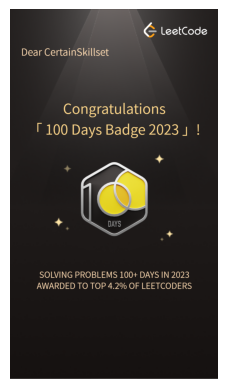

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Q: What is in this image?
A: graduation

Q: What is the color of the object?
A: yellow

Q: What is the shape of the object?
A: square



In [ ]:
# Install necessary libraries
!pip install transformers
!pip install torch torchvision
!pip install sentencepiece  # for transformer models

from transformers import BlipProcessor, BlipForQuestionAnswering
import torch
from PIL import Image
from google.colab import files

# Load BLIP processor and model
processor = BlipProcessor.from_pretrained("Salesforce/blip-vqa-base")
model = BlipForQuestionAnswering.from_pretrained("Salesforce/blip-vqa-base")

# Upload an image
uploaded = files.upload()

# Load the uploaded image
for filename in uploaded.keys():
    image = Image.open(filename).convert("RGB")

import matplotlib.pyplot as plt

# Display the image
plt.imshow(image)
plt.axis("off")
plt.show()

questions = [
    "What is in this image?",  # Example question 1
    "What is the color of the object?",  # Example question 2
    "What is the shape of the object?"
    # You can add more questions
]

# Print answers to the questions
for question in questions:
    inputs = processor(image, question, return_tensors="pt")
    with torch.no_grad():
        # Use model.generate() for inference instead of model(**inputs)
        generated_ids = model.generate(**inputs)
    answer = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]  # Decode answer
    print(f"Q: {question}")
    print(f"A: {answer}\n")


In [ ]:
!git clone https://github.com/ultralytics/yolov5.git
!pip install -qr yolov5/requirements.txt  # Install dependencies


Cloning into 'yolov5'...
remote: Enumerating objects: 17045, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 17045 (delta 10), reused 18 (delta 8), pack-reused 17022 (from 1)
Receiving objects: 100% (17045/17045), 15.66 MiB | 12.05 MiB/s, done.
Resolving deltas: 100% (11700/11700), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.0/887.0 kB 14.7 MB/s eta 0:00:00


In [ ]:
import torch
from yolov5 import detect, train, export

# 1. Train the YOLOv5 Nano model
train.run(data='coco128.yaml',  # COCO128 dataset for quick example
          imgsz=640,  # Input image size
          batch_size=16,  # Batch size
          epochs=10,  # Number of epochs
          weights='yolov5n.pt',  # Pre-trained YOLOv5 Nano weights
          device='cpu')  # Use GPU if available


train: weights=yolov5n.pt, cfg=, data=coco128.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=yolov5/data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=cpu, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-383-g1435a8ee Python-3.10.12 torch-2.5.1+cu121 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj


                 from  n    params  module                                  arguments                     
  0                -1  1      1760  models.common.Conv                      [3, 16, 6, 2, 2]              
  1                -1  1      4672  models.common.Conv                      [16, 32, 3, 2]                
  2                -1  1      4800  models.common.C3                        [32, 32, 1]                   
  3                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  4                -1  2     29184  models.common.C3                        [64, 64, 2]                   
  5                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  6                -1  3    156928  models.common.C3                        [128, 128, 3]                 
  7                -1  1    295424  models.common.Conv                      [128, 256, 3, 2]              
  8                -1  1    296448  

UsageError: Run (ugbbiwdy) is finished. The call to `_summary_update_callback` will be ignored. Please make sure that you are using an active run.

In [ ]:

# 2. Quantize the model for edge devices
# Export the trained model to ONNX format with INT8 quantization
export.run(weights='runs/train/exp/weights/best.pt',  # Path to trained weights
           include=['onnx'],  # Export to ONNX format
           device='cpu',  # Use GPU for export
           optimize=True,  # Apply optimization
           dynamic=False,  # Fixed input size
           simplify=True)  # Simplify the model

# 3. Perform object detection with the optimized model
detect.run(weights='runs/train/exp/weights/best.onnx',  # Quantized ONNX model
           source='data/images',  # Folder with images or video for detection
           imgsz=640,  # Input image size
           device='cpu')  # Use GPU for inference

In [ ]:
# Install dependencies
!pip install torch torchvision matplotlib nltk

import torch
import torch.nn as nn
import torchvision.models as models
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import os
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Custom dataset class
class ImageCaptionDataset(Dataset):
    def __init__(self, image_dir, captions_file, transform):
        self.image_dir = image_dir
        self.captions = []
        self.image_paths = []
        self.transform = transform

        # Load captions and image paths
        with open(captions_file, 'r') as f:
            lines = f.readlines()
            for line in lines:
                img_name, caption = line.strip().split('\t')
                self.image_paths.append(os.path.join(image_dir, img_name))
                self.captions.append(caption)

    def __len__(self):
        return len(self.captions)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert('RGB')
        if self.transform:
            image = self.transform(image)
        caption = self.captions[idx]
        return image, caption

# Image preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# CNN Encoder
class EncoderCNN(nn.Module):
    def __init__(self):
        super(EncoderCNN, self).__init__()
        resnet = models.resnet18(pretrained=True)
        self.resnet = nn.Sequential(*list(resnet.children())[:-1])  # Remove last FC layer
        self.fc = nn.Linear(resnet.fc.in_features, 256)  # Reduce feature size
        self.relu = nn.ReLU()

    def forward(self, images):
        features = self.resnet(images).squeeze()
        features = self.fc(features)
        return self.relu(features)

# RNN Decoder
class DecoderRNN(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, vocab_size):
        super(DecoderRNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim + 256, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, vocab_size)

    def forward(self, features, captions):
        embeddings = self.embedding(captions)
        inputs = torch.cat((features.unsqueeze(1), embeddings), dim=1)  # Concatenate image features
        lstm_out, _ = self.lstm(inputs)
        outputs = self.fc(lstm_out)
        return outputs

# Hyperparameters
embedding_dim = 256
hidden_dim = 512
vocab_size = 5000  # Example vocab size

# Instantiate the model
encoder = EncoderCNN()
decoder = DecoderRNN(embedding_dim, hidden_dim, vocab_size)

# Dataset and DataLoader
dataset = ImageCaptionDataset(image_dir='path/to/images',
                              captions_file='path/to/captions.txt',
                              transform=transform)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(list(encoder.parameters()) + list(decoder.parameters()), lr=0.001)

# Training loop (simple example)
for epoch in range(5):
    for images, captions in dataloader:
        # Tokenize captions and convert to indices (dummy example, replace with tokenizer)
        captions = torch.randint(0, vocab_size, (captions.size(0), 20))  # Fake tokenized captions

        features = encoder(images)
        outputs = decoder(features, captions)

        loss = criterion(outputs.view(-1, vocab_size), captions.view(-1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/5], Loss: {loss.item():.4f}')

# Inference (generate captions)
def generate_caption(image_path):
    encoder.eval()
    decoder.eval()

    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0)
    features = encoder(image)

    caption = [0]  # Start token
    for _ in range(20):  # Max caption length
        caption_tensor = torch.tensor([caption], dtype=torch.long)
        outputs = decoder(features, caption_tensor)
        predicted = outputs.argmax(2)[:, -1].item()
        if predicted == 1:  # End token
            break
        caption.append(predicted)

    return caption  # Convert indices back to words using vocab

# Example
print(generate_caption('path/to/test_image.jpg'))


In [ ]:
# Install necessary librar
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('tester.png', cv2.IMREAD_COLOR)  # Replace with your image path
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for displaying

# Resize the image
resized_image = cv2.resize(image, (200, 200))  # Resize to 200x200 pixels

# Apply Gaussian Blur
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Convert to grayscale for histogram equalization
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
equalized_image = cv2.equalizeHist(gray_image)


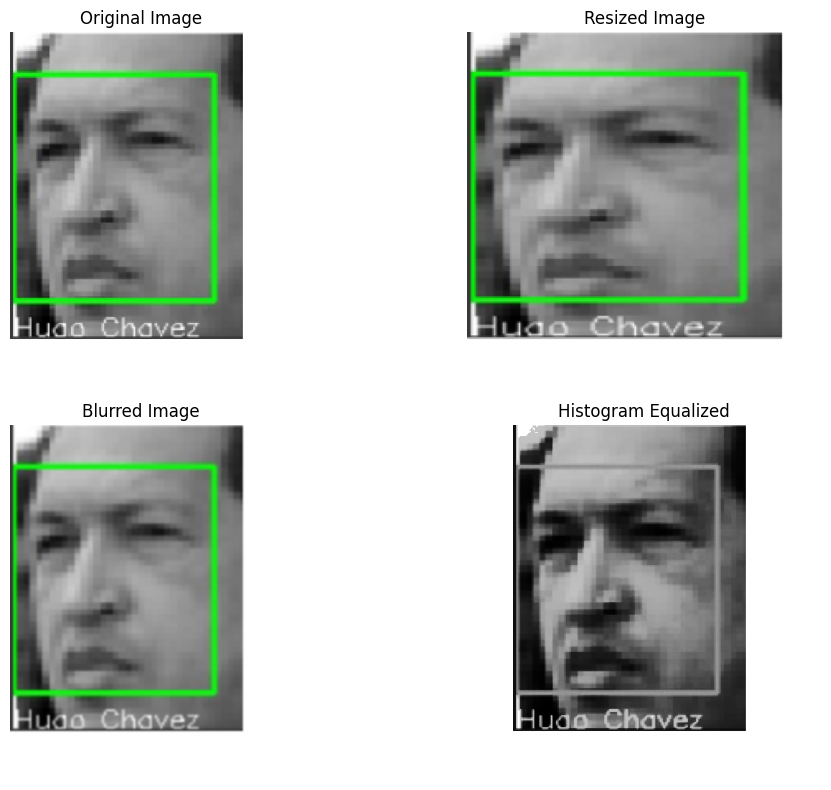

In [ ]:
titles = ['Original Image', 'Resized Image', 'Blurred Image', 'Histogram Equalized']
images = [image, resized_image, blurred_image, equalized_image]

plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    if len(images[i].shape) == 2:  # Grayscale images
        plt.imshow(images[i], cmap='gray')
    else:
        plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
from darknet import *
network, class_names, class_colors = load_network("cfg/yolov4-csp.cfg", "cfg/coco.data", "yolov4-csp.weights")
width = network_width(network)
height = network_height(network)
def darknet_helper(img, width, height):
  darknet_image = make_image(width, height, 3)
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_resized = cv2.resize(img_rgb, (width, height),
                              interpolation=cv2.INTER_LINEAR)
  img_height, img_width, _ = img.shape
  width_ratio = img_width/width
  height_ratio = img_height/height
  copy_image_from_bytes(darknet_image, img_resized.tobytes())
  detections = detect_image(network, class_names, darknet_image)
  free_image(darknet_image)
  return detections, width_ratio, height_ratio
image = cv2.imread("data/person.jpg")
detections, width_ratio, height_ratio = darknet_helper(image, width, height)
for label, confidence, bbox in detections:
  left, top, right, bottom = bbox2points(bbox)
  left, top, right, bottom = int(left * width_ratio), int(top * height_ratio), int(right * width_ratio), int(bottom * height_ratio)
  cv2.rectangle(image, (left, top), (right, bottom), class_colors[label], 2)
  cv2.putText(image, "{} [{:.2f}]".format(label, float(confidence)),
                    (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                    class_colors[label], 2)
cv2_imshow(image)
